## Kaggle Workloads Run-time Experiment
In this notebook, we make the plot in Figure 9 (a) of Section 6.5.

Experiment result is located here:

'./experiment_results/remote/warmstarting/openml/cloud-41/2019-10-21/15-09.csv'


In [60]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from openml import setups, flows
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
sns.set_context("paper", font_scale=2, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]
OTHER_COLOR = sns.color_palette()[2]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results'

output_directory = WRITE_DIRECTORY_ROOT + '/openml/warmstarting'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [61]:
TICK_LABEL_SIZE = 34
AXIS_FONT = 40


In [62]:
# MODE = 'remote'
# result_folder = ROOT_RESULT_FOLDER + '/' + MODE + '/warmstarting/openml'
# result_file = result_folder + '/cloud-41/2019-10-16/14-34.csv'
MODE = 'remote'
result_folder = ROOT_RESULT_FOLDER + '/' + MODE + '/warmstarting/openml'
result_file = result_folder + '/cloud-41/2019-10-21/15-09.csv'

In [63]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'pipeline', 'setup', 'type', 'warmstart', 'mat_budget','score', 'total_run_time'
]

method_map = {'optimized': 'CO', 'baseline': 'OML'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)

execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id', 'type','mat_budget'])['total_run_time'].apply(lambda x: x.cumsum())
execution_times['mat_budget'] = execution_times['mat_budget'] / (1024. * 1024.)
execution_times['workload'] = execution_times.groupby(['exp_id', 'type','mat_budget']).cumcount() + 1
execution_times['type'] = execution_times['type'].replace(method_map)


In [64]:
execution_times['type'] = ['CO+W' if (x['type'] == 'CO') and (x['warmstart'] == True) else x['type'] for i,x in execution_times[['type','warmstart']].iterrows()]


In [65]:
execution_times['type'] = ['CO-W' if (x['type'] == 'CO') and (x['warmstart'] == False) else x['type'] for i,x in execution_times[['type','warmstart']].iterrows()]


In [78]:
def plot_executions_time(df,loc=None):
    plt.figure(figsize=(8,4))
    plot = sns.lineplot(
        data=df,
        x='workload',
        y='cumulative_run_time',
        hue='type',
        style='type',
        lw=3,
        ci='sd',
        hue_order=['CO+W','OML','CO-W'],
        dashes={
            'CO+W': (1, 0),
            'OML': (3, 1),
            'CO-W': (1, 1),
        },
         palette={
            'CO+W': SYSTEM_COLOR,
            'OML': BASELINE_COLOR,
            'CO-W': OTHER_COLOR
        },
        legend='brief')

    legend = plt.legend(
            loc='upper left',
            handletextpad=0.1,
            labelspacing=0.0,
            bbox_to_anchor=(-.08, 1.3))
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    plot.set_xlabel('OpenML Workload', fontsize=AXIS_FONT)
    plot.set_ylabel('Cumulative \nRun Time (s)', fontsize=AXIS_FONT)
    plt.tick_params(labelsize=TICK_LABEL_SIZE)
    lg = plt.legend()
    handles = lg.legendHandles
    labels = ['CO+W','OML','CO-W']
    del handles[0]
    legend = plt.legend(
        handles,
        labels,
        loc='upper center',
        handlelength=1.2,
        handletextpad=0.05,
        fontsize=TICK_LABEL_SIZE,
        numpoints=1,
        ncol=3,
        columnspacing=0.2,
        bbox_to_anchor=(0.5, 1.27))
    plot.set_yticks([0, 200, 400, 600, 800])
    plot.set_xticks([0, 500, 1000, 1500, 2000])
    plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    for line in legend.get_lines():
        line.set_linewidth(4.0)
    if loc is not None:
        plt.savefig(loc, bbox_inches='tight')

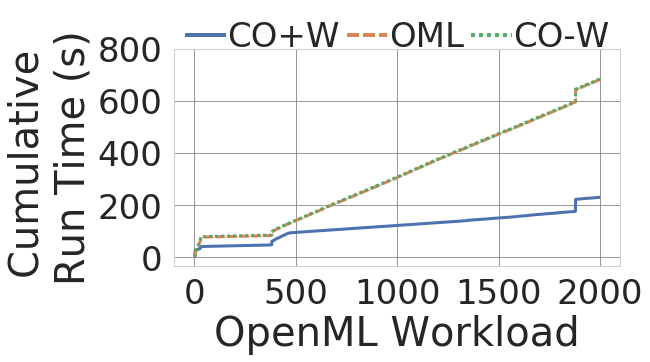

In [79]:
plot_executions_time(execution_times, output_directory+'/warmstarting.pgf')
#plot_executions_time(execution_times)

In [27]:
CO = execution_times[execution_times.type == 'CO-W']

In [28]:
CO.sort_values('total_run_time', ascending=False).head()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
5878,15:40:44,860EB2C2,openml,6952,3911053,CO-W,False,0.1,0.71,47.308966,647.798921,1879
11878,16:39:30,6C6ECEFF,openml,6952,3911053,CO-W,False,0.1,0.71,46.262853,642.278992,1879
17878,17:38:10,0EB04909,openml,6952,3911053,CO-W,False,0.1,0.71,46.208819,642.584893,1879
4004,15:40:44,860EB2C2,openml,5914,44102,CO-W,False,0.1,0.70,19.723994,25.607213,5
10004,16:39:30,6C6ECEFF,openml,5914,44102,CO-W,False,0.1,0.70,19.613955,25.562752,5


In [29]:
execution_times[execution_times.type =='CO-W'].tail()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
17995,17:38:10,0EB04909,openml,6969,3938732,CO-W,False,0.1,0.80,0.275671,681.407681,1996
17996,17:38:10,0EB04909,openml,6969,3938736,CO-W,False,0.1,0.76,0.444563,681.852244,1997
17997,17:38:10,0EB04909,openml,6969,3939022,CO-W,False,0.1,0.77,0.361061,682.213305,1998
17998,17:38:10,0EB04909,openml,6969,3939128,CO-W,False,0.1,0.77,0.275222,682.488527,1999
17999,17:38:10,0EB04909,openml,6969,3939524,CO-W,False,0.1,0.78,0.280164,682.768691,2000


In [30]:
execution_times[execution_times.type =='CO+W'].tail()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
13995,17:07:13,F873095B,openml,6969,3938732,CO+W,True,0.1,0.79,0.053873,229.570382,1996
13996,17:07:13,F873095B,openml,6969,3938736,CO+W,True,0.1,0.79,0.053876,229.624258,1997
13997,17:07:13,F873095B,openml,6969,3939022,CO+W,True,0.1,0.79,0.056408,229.680666,1998
13998,17:07:13,F873095B,openml,6969,3939128,CO+W,True,0.1,0.74,0.053351,229.734017,1999
13999,17:07:13,F873095B,openml,6969,3939524,CO+W,True,0.1,0.75,0.054008,229.788025,2000


In [146]:
execution_times[execution_times.type =='OML'].tail()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
3995,14:50:47,B2CF354E,openml,6969,3938732,OML,True,1.0,0.80,0.273975,688.664347,1996
3996,14:50:47,B2CF354E,openml,6969,3938736,OML,True,1.0,0.76,0.442746,689.107093,1997
3997,14:50:47,B2CF354E,openml,6969,3939022,OML,True,1.0,0.77,0.363005,689.470098,1998
3998,14:50:47,B2CF354E,openml,6969,3939128,OML,True,1.0,0.77,0.277489,689.747587,1999
3999,14:50:47,B2CF354E,openml,6969,3939524,OML,True,1.0,0.78,0.279330,690.026917,2000
